In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Sources: 

- Joos et al. Carbon dioxide and climate impulse response functions for the computation of greenhouse gas metrics: a multi-model analysis, Atmos. Chem. Phys., 13, 2793–2825, https://doi.org/10.5194/acp-13-2793-2013, 2013.

- Anthropogenic and Natural Radiative Forcing Supplementary Material. In: Climate Change 2013: The Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change, https://www.ipcc.ch/site/assets/uploads/2018/07/WGI_AR5.Chap_.8_SM.pdf

## Generating an IRF curve

In [2]:
def get_irf_curve():
    
    # parameters from Joos et al., 2013 (Table 5) 
    # https://doi.org/10.5194/acp-13-2793-2013
    a = [0.2173, 0.2240, 0.2824, 0.2763]
    tau = [0, 394.4, 36.54, 4.304]
    
    t_horizon = np.arange(1001) 
    irf_curve = [a[0]] * len(t_horizon)
    for t in t_horizon:
        for i in np.arange(1,len(a)):
            irf_curve[t] =  irf_curve[t] + (a[i] * np.exp(-t/tau[i]))
            
    return irf_curve

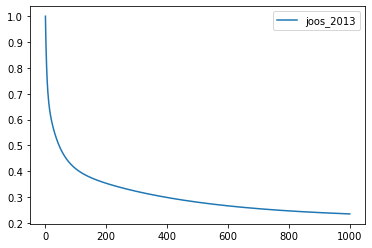

In [3]:
joos_2013 = get_irf_curve()
plt.plot(joos_2013, label='joos_2013')
plt.legend()

## Comparing results

Joos et al. (2013) report the following time-dependent fractions of an original pulse of CO2 remaining in the atmosphere in section 4.1: 
- 0.60 +- 0.14 at year 20
- 0.41 +- 0.13 at year 100
- (more than) 0.25 +- 0.09 at year 1000

In [4]:
print()
print('At t=0:   '+ str(round(joos_2013[0],3)))
print('At t=20:   '+ str(round(joos_2013[21],2)))
print('At t=100:  '+ str(round(joos_2013[101],2)))
print('At t=1000: '+ str(round(joos_2013[-1],6)))
print()


At t=0:   1.0
At t=20:   0.59
At t=100:  0.41
At t=1000: 0.235046



The IPCC AR5 Chapter 8 SM reports the following time integrated IRF mean values using the Joos et al. 2013 parameters in Table 8.SM.11: 

- 14.2 at year 20
- 52.4 at year 100


In [5]:
print()
print('At t=20:   '+ str(round(np.trapz(joos_2013[:21]),1)))
print('At t=100:   '+ str(round(np.trapz(joos_2013[:101]),1)))
print()


At t=20:   14.2
At t=100:   52.4

